## **Import necessary libraries**


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# !pip install gradio==3.50
import gradio as gr
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [152]:
warnings.filterwarnings("ignore")

## **Load the dataset**


In [153]:
df = pd.read_csv("telecom_churn_dataset.csv")

# **Data Cleaning and Exploration**

### **Explore the dataset**


In [154]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [156]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [157]:
# Check for missing data
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [158]:
# Check the number of unique values in columns
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


### **Handle missing values**

In [159]:
# Convert 'TotalCharges' to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df['TotalCharges'].median(), inplace=True)
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### **Visualize distributions and correlations**

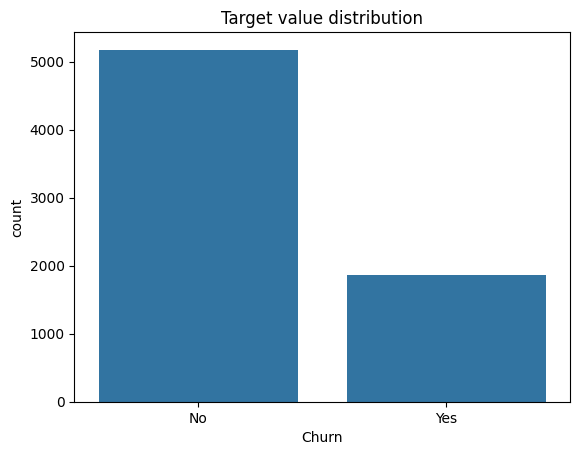

In [160]:
# Visualize the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.title('Target value distribution')
plt.show()

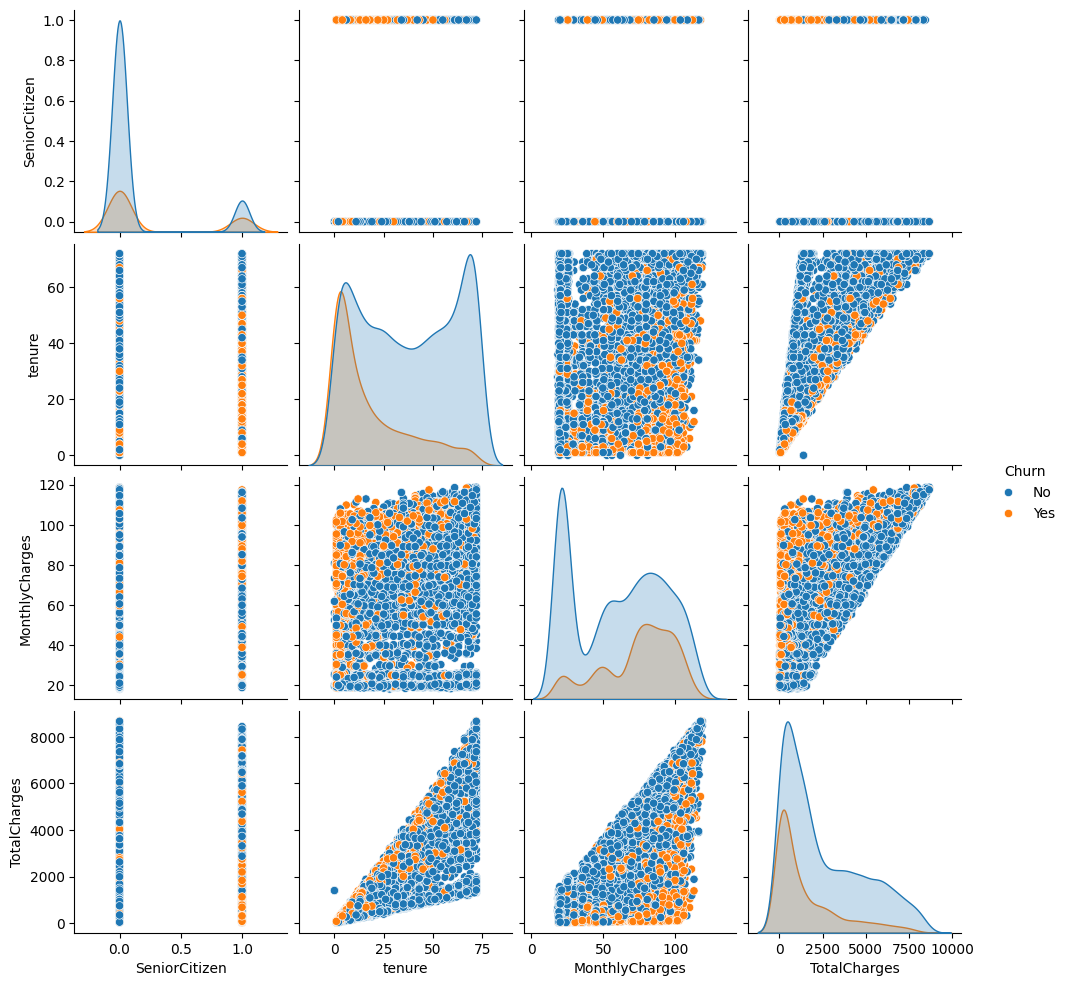

In [161]:
sns.pairplot(df, hue='Churn')
plt.show()

# **Model Selection and Implementation**



### **Define features and target variable**

In [162]:
df.drop(['customerID'], axis=1, inplace=True)

In [163]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### **Convert categorical variables**

In [164]:
# Encode categorical data
categorical = df.select_dtypes(include=['object']).columns
for i in categorical:
    if i != 'Churn':
        df[i] = LabelEncoder().fit_transform(df[i])

In [165]:
# Convert 'Churn' to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [166]:
# Split the data into features and target
features = df.drop('Churn', axis=1)
target = df['Churn']

In [167]:
features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


### **Feature Scaling**

In [168]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

### **Split the dataset into training and testing sets**

In [169]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=20)

### **Apply SMOTE for oversampling**

In [170]:
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### **Logistic Regression**

In [171]:
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test)

### **Random Forest**


In [172]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

# **Model Evaluation**

In [173]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

### **Evaluate Logistic Regression**

In [174]:
accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, conf_matrix_logreg = evaluate_model(y_test, y_pred_logreg)

### **Evaluate Random Forest**

In [175]:
accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix_rf = evaluate_model(y_test, y_pred_rf)

### **Print evaluation metrics**

In [176]:
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)

print("\nRandom Forest Evaluation:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Logistic Regression Evaluation:
Accuracy: 0.758694109297374
Precision: 0.5052631578947369
Recall: 0.8323699421965318
F1 Score: 0.62882096069869
Confusion Matrix:
 [[781 282]
 [ 58 288]]

Random Forest Evaluation:
Accuracy: 0.794180269694819
Precision: 0.572538860103627
Recall: 0.638728323699422
F1 Score: 0.6038251366120219
Confusion Matrix:
 [[898 165]
 [125 221]]


# **Hyperparameter Tuning (Grid Search)**

In [177]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

In [93]:
rf_grid = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

## **Final Model with Best Parameters**

In [94]:
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train_resampled, y_train_resampled)
y_pred_best_rf = best_rf.predict(X_test)

## **Evaluate Final Model**

In [95]:
accuracy_best_rf, precision_best_rf, recall_best_rf, f1_best_rf, conf_matrix_best_rf = evaluate_model(y_test, y_pred_best_rf)

print("\nFinal Model Evaluation (Random Forest with Best Parameters):")
print("Accuracy:", accuracy_best_rf)
print("Precision:", precision_best_rf)
print("Recall:", recall_best_rf)
print("F1 Score:", f1_best_rf)
print("Confusion Matrix:\n", conf_matrix_best_rf)


Final Model Evaluation (Random Forest with Best Parameters):
Accuracy: 0.7934705464868701
Precision: 0.5656324582338902
Recall: 0.684971098265896
F1 Score: 0.6196078431372549
Confusion Matrix:
 [[881 182]
 [109 237]]


In [178]:
# Define the new data point
new_data_point = {
    "gender": 'Male',
    "SeniorCitizen": 0,
    "Partner": 'Yes',
    "Dependents": 'No',
    "tenure": 5,
    "PhoneService": 'Yes',
    "MultipleLines": 'No',
    "InternetService": 'DSL',
    "OnlineSecurity": 'No',
    "OnlineBackup": 'Yes',
    "DeviceProtection": 'No',
    "TechSupport": 'No',
    "StreamingTV": 'Yes',
    "StreamingMovies": 'Yes',
    "Contract": 'Month-to-month',
    "PaperlessBilling": 'Yes',
    "PaymentMethod": 'Electronic check',
    "MonthlyCharges": 45.05,
    "TotalCharges": 100
}

# Preprocess the new data point
def preprocess_data(new_data_point):
    # Convert to DataFrame
    new_df = pd.DataFrame([new_data_point])

    # Ensure all categorical columns are present and encoded
    for column in categorical:
        if column != 'Churn' and column not in new_df.columns:
            new_df[column] = 0  # Assign a default value if missing
        elif column != 'Churn':
            new_df[column] = LabelEncoder().fit_transform(new_df[column])

    numeric_features = new_df.select_dtypes(include=['int64', 'float64']).columns
    new_df[numeric_features] = scaler.transform(new_df[numeric_features])

    return new_df

# Preprocess the new data point
new_df = preprocess_data(new_data_point)

# Make predictions using the trained model
prediction = best_rf.predict(new_df)
if prediction[0]==1:
  prediction = "Yes"
else:
  prediction = "No"

print("Churn Prediction:", prediction)

Churn Prediction: Yes
